# Final Capstone Project

This notebook is going to be the final notebook for the capstone project. 

This notebook is dedicated to finding out if the problem of food scarcity in food deserts can be identified using machine learning. 

## Importing appropriate packages

In [1]:
# standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sb
sb.set(rc={'figure.figsize':(15,10)}) # default plot size
plt.style.use('fivethirtyeight') # default plot style


# packages for clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hc
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

# preprocessing packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import folium # map rendering library

print('All packages are imported.')


All packages are imported.


## Webscrape a webpage for each of the zipcodes of New York City

#### Since New York is divided by borough, each their own county, they need to be webscraped individually. 

## Bronx

In [2]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighborhoods_in_the_Bronx").text

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

# create a list to store neighborhood data
neighborhoodList = []

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

# create a new DataFrame from the list
bx = pd.DataFrame({"Neighborhood": neighborhoodList})


bx['Neighborhood'] = bx['Neighborhood'].astype(str).str[1:]


sep = '('
bx['Neighborhood'] = bx['Neighborhood'].apply(lambda x: x.split(sep,1)[0])
bx['Neighborhood'] = bx['Neighborhood'].str.strip()
bx['Neighborhood'] = bx['Neighborhood'].str.rstrip()

In [3]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Bronx, New York'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in bx["Neighborhood"].tolist() ]

In [4]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
bx['Latitude'] = df_coords['Latitude']
bx['Longitude'] = df_coords['Longitude']

In [5]:
# save the DataFrame as CSV file
bx.to_csv("bx_neighborhoods.csv", index=False)

# check the neighborhoods and the coordinates
print(bx.shape)
bx.head()

(32, 3)


,Neighborhood,Latitude,Longitude
0,"Bedford Park, Bronx‎",40.869990,-73.88573
1,"Belmont, Bronx‎",40.855460,-73.88569
2,"City Island, Bronx‎",40.855640,-73.79171
3,"Co-op City, Bronx‎",40.879939,-73.82317
4,"Concourse, Bronx‎",40.827630,-73.92533


## Manhattan

In [6]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighborhoods_in_Manhattan").text

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

# create a list to store neighborhood data
neighborhoodList = []

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

# create a new DataFrame from the list
mh = pd.DataFrame({"Neighborhood": neighborhoodList})


mh['Neighborhood'] = mh['Neighborhood'].astype(str).str[1:]


sep = '('
mh['Neighborhood'] = mh['Neighborhood'].apply(lambda x: x.split(sep,1)[0])
mh['Neighborhood'] = mh['Neighborhood'].str.strip()

In [7]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Manhattan, New York'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in mh["Neighborhood"].tolist() ]

In [8]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
mh['Latitude'] = df_coords['Latitude']
mh['Longitude'] = df_coords['Longitude']

# save the DataFrame as CSV file
mh.to_csv("mh_neighborhoods.csv", index=False)

# check the neighborhoods and the coordinates
print(mh.shape)
mh.head()

(44, 3)


,Neighborhood,Latitude,Longitude
0,Battery Park City‎,40.71131,-74.015900
1,Bowery‎,40.72328,-73.992893
2,"Chelsea, Manhattan‎",40.74610,-74.000450
3,"Civic Center, Manhattan‎",40.71337,-74.003800
4,Columbus Circle‎,40.76573,-73.983380


## Brooklyn

In [9]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighborhoods_in_Brooklyn").text

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

# create a list to store neighborhood data
neighborhoodList = []

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

# create a new DataFrame from the list
bk = pd.DataFrame({"Neighborhood": neighborhoodList})


bk['Neighborhood'] = bk['Neighborhood'].astype(str).str[1:]


sep = '('
bk['Neighborhood'] = bk['Neighborhood'].apply(lambda x: x.split(sep,1)[0])
bk['Neighborhood'] = bk['Neighborhood'].str.strip()

In [10]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Brooklyn, New York'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in bk["Neighborhood"].tolist() ]

# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
bk['Latitude'] = df_coords['Latitude']
bk['Longitude'] = df_coords['Longitude']

In [11]:
bk = bk.drop(32,axis = 0) # drops a option that does not provide a neighborhood 

In [12]:
# save the DataFrame as CSV file
bk.to_csv("bk_neighborhoods.csv", index=False)


# check the neighborhoods and the coordinates
print(bk.shape)
bk.head()

(39, 3)


,Neighborhood,Latitude,Longitude
0,"Bay Ridge, Brooklyn‎",40.619600,-74.027569
1,"Bedford–Stuyvesant, Brooklyn‎",40.681945,-73.933294
2,"Bensonhurst, Brooklyn‎",40.604820,-73.995280
3,Boerum Hill‎,40.689430,-73.988010
4,"Borough Park, Brooklyn‎",40.638820,-73.989120


## Queens

In [13]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighborhoods_in_Queens,_New_York").text

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

# create a list to store neighborhood data
neighborhoodList = []

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

# create a new DataFrame from the list
qn = pd.DataFrame({"Neighborhood": neighborhoodList})


In [14]:
# have to format the entries so that are stripped of white spaces and special characters

qn['Neighborhood'] = qn['Neighborhood'].astype(str).str[1:]

sep = '('
qn['Neighborhood'] = qn['Neighborhood'].apply(lambda x: x.split(sep,1)[0])
qn['Neighborhood'] = qn['Neighborhood'].str.strip()

In [15]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Queens, New York'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in qn["Neighborhood"].tolist() ]

# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
qn['Latitude'] = df_coords['Latitude']
qn['Longitude'] = df_coords['Longitude']

In [17]:
qn

,Neighborhood,Latitude,Longitude
0,"Astoria, Queens‎",40.768609,-73.909420
1,"Bayside, Queens‎",40.564507,-73.912724
2,"Corona, Queens‎",40.742057,-73.874234
3,"Douglaston–Little Neck, Queens‎",40.768561,-73.747657
4,"East Elmhurst, Queens‎",40.770502,-73.865265
5,"Elmhurst, Queens‎",40.745016,-73.878274
6,"Floral Park, New York‎",40.723640,-73.705760
7,"Flushing, Queens‎",40.750948,-73.843207
8,"Forest Hills, Queens‎",40.696453,-73.865311
9,"Fresh Meadows, Queens‎",40.743396,-73.795339


In [18]:
qn = qn.drop([20,22],axis = 0) # drops a row that does not represent a neighborhood


In [19]:
qn

,Neighborhood,Latitude,Longitude
0,"Astoria, Queens‎",40.768609,-73.909420
1,"Bayside, Queens‎",40.564507,-73.912724
2,"Corona, Queens‎",40.742057,-73.874234
3,"Douglaston–Little Neck, Queens‎",40.768561,-73.747657
4,"East Elmhurst, Queens‎",40.770502,-73.865265
5,"Elmhurst, Queens‎",40.745016,-73.878274
6,"Floral Park, New York‎",40.723640,-73.705760
7,"Flushing, Queens‎",40.750948,-73.843207
8,"Forest Hills, Queens‎",40.696453,-73.865311
9,"Fresh Meadows, Queens‎",40.743396,-73.795339


In [20]:
# save the DataFrame as CSV file
qn.to_csv("qn_neighborhoods.csv", index=False)


# check the neighborhoods and the coordinates
print(qn.shape)
qn.head()

(27, 3)


,Neighborhood,Latitude,Longitude
0,"Astoria, Queens‎",40.768609,-73.909420
1,"Bayside, Queens‎",40.564507,-73.912724
2,"Corona, Queens‎",40.742057,-73.874234
3,"Douglaston–Little Neck, Queens‎",40.768561,-73.747657
4,"East Elmhurst, Queens‎",40.770502,-73.865265


## For the reason of extreme differences in demographics and neighbor hood make up we will not be including Staten Island

In [21]:
ny = pd.concat([bx,mh,bk,qn], ignore_index = True)

In [22]:
ny.head()

,Neighborhood,Latitude,Longitude
0,"Bedford Park, Bronx‎",40.869990,-73.88573
1,"Belmont, Bronx‎",40.855460,-73.88569
2,"City Island, Bronx‎",40.855640,-73.79171
3,"Co-op City, Bronx‎",40.879939,-73.82317
4,"Concourse, Bronx‎",40.827630,-73.92533


In [23]:
ny.head(51)

,Neighborhood,Latitude,Longitude
0,"Bedford Park, Bronx‎",40.869990,-73.885730
1,"Belmont, Bronx‎",40.855460,-73.885690
2,"City Island, Bronx‎",40.855640,-73.791710
3,"Co-op City, Bronx‎",40.879939,-73.823170
4,"Concourse, Bronx‎",40.827630,-73.925330
5,"Eastchester, Bronx‎",40.888110,-73.828350
6,"Fordham, Bronx‎",40.858940,-73.898850
7,"Highbridge, Bronx‎",40.842117,-73.928200
8,"Hunts Point, Bronx‎",40.812420,-73.884500
9,"Jerome Park, Bronx‎",40.865470,-73.898960


In [24]:
ny.to_csv('ny_neighborhood.csv',index=False)


## Map the points using Folium

In [25]:
# get the coordinates of New York City
address = 'New York, New York'

geolocator = Nominatim(user_agent="coursera-capstone-project")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York, New York {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York, New York 40.7127281, -74.0060152.


In [45]:
# create map of Toronto using latitude and longitude values
map_ny = folium.Map(location=[latitude, longitude], zoom_start=10.45)

# add markers to map
for lat, lng, neighborhood in zip(ny['Latitude'], ny['Longitude'], ny['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_ny)  
    
map_ny

## Next, we use the Foursquare API. 

#### First, for New York City

In [27]:
ny = pd.read_csv('ny_neighborhood.csv')

In [28]:
ny

,Neighborhood,Latitude,Longitude
0,"Bedford Park, Bronx‎",40.869990,-73.885730
1,"Belmont, Bronx‎",40.855460,-73.885690
2,"City Island, Bronx‎",40.855640,-73.791710
3,"Co-op City, Bronx‎",40.879939,-73.823170
4,"Concourse, Bronx‎",40.827630,-73.925330
...,...,...,...
137,"Ridgewood, Queens‎",40.706070,-73.902610
138,"Rockaway, Queens‎",40.663276,-73.776791
139,"Whitestone, Queens‎",40.771893,-73.832252
140,"Woodhaven, Queens‎",40.710361,-73.859759


In [50]:
# define Foursquare Credentials and Version
CLIENT_ID = '---redacted---' # your Foursquare ID
CLIENT_SECRET = '---redacted---' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

radius =4000
LIMIT = 500
categoryId = '52f2ab2ebcbc57f1066b8b46,4bf58dd8d48988d118951735'


In [ ]:
radius =4000
LIMIT = 500
categoryId = '52f2ab2ebcbc57f1066b8b46,4bf58dd8d48988d118951735'

venues = []

for lat, long, neighborhood in zip(ny['Latitude'], ny['Longitude'], ny['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?intent=browse&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId ={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT,
        categoryId)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [167]:

# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 
                     'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head(100)

(14047, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Bedford Park Bronx,40.86999,-73.88573,The New York Botanical Gardens - The Rock Garden,40.864459,-73.882456,Beer Garden
1,Bedford Park Bronx,40.86999,-73.88573,Enid A. Haupt Conservatory,40.864256,-73.882154,Botanical Garden
2,Bedford Park Bronx,40.86999,-73.88573,Edgar Allan Poe Cottage,40.865573,-73.894421,History Museum
3,Bedford Park Bronx,40.86999,-73.88573,E. Mosholu Parkway South and Bainbridge Ave,40.872248,-73.882286,Park
4,Bedford Park Bronx,40.86999,-73.88573,NYBG Holiday Train Show,40.864100,-73.882050,Exhibit
...,...,...,...,...,...,...,...
95,Bedford Park Bronx,40.86999,-73.88573,Tin Marin,40.887073,-73.907148,Tapas Restaurant
96,Bedford Park Bronx,40.86999,-73.88573,Yo-Burger,40.887337,-73.907184,Burger Joint
97,Bedford Park Bronx,40.86999,-73.88573,ChocNYC,40.868396,-73.918742,Bakery
98,Bedford Park Bronx,40.86999,-73.88573,John & Joe's Pizzeria,40.854520,-73.865824,Pizza Place


In [168]:
print('There are {} uniques types of venues.'.format(len(venues_df['VenueCategory'].unique())))


# print out the list of categories
venues_df['VenueCategory'].unique()[:50]

There are 338 uniques types of venues.


array(['Beer Garden', 'Botanical Garden', 'History Museum', 'Park',
       'Exhibit', 'Garden', 'Gift Shop', 'Pizza Place',
       'Italian Restaurant', 'Café', 'Farmers Market', 'Deli / Bodega',
       'Martial Arts School', 'Coffee Shop', 'Trail', 'Bakery', 'Market',
       'Food & Drink Shop', 'Fish Market', 'Gym / Fitness Center',
       'Vietnamese Restaurant', 'Zoo', 'Gourmet Shop', 'Yoga Studio',
       'Beer Bar', 'Tattoo Parlor', 'Latin American Restaurant',
       'Dessert Shop', 'Bar', 'Mexican Restaurant',
       'Caribbean Restaurant', 'Track', 'Smoke Shop', 'Zoo Exhibit',
       'Pub', 'Fast Food Restaurant', 'Diner', 'Grocery Store', 'Brewery',
       'Food', 'Plaza', 'Tapas Restaurant', 'Burger Joint',
       'Japanese Restaurant', 'Theme Park', 'Cheese Shop',
       'Souvenir Shop', 'Scenic Lookout', 'Juice Bar', 'Video Game Store'],
      dtype=object)

In [123]:
# one hot encoding
ny_hot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_hot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ny_hot.columns[-1]] + list(ny_hot.columns[:-1])
ny_hot = ny_hot[fixed_columns]


import re
ny_hot['Neighborhoods'] = ny_hot['Neighborhoods'].map(lambda x: re.sub(r'\W+', ' ', x))


print(ny_hot.shape)
ny_hot.head()

(14047, 339)


,Neighborhoods,Accessories Store,Adult Boutique,African Restaurant,Airport Food Court,Airport Lounge,Airport Service,American Restaurant,Animal Shelter,Antique Shop,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yemeni Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Bedford Park Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bedford Park Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bedford Park Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bedford Park Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bedford Park Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
ny_hot.columns.values

array(['Neighborhoods', 'Accessories Store', 'Adult Boutique',
       'African Restaurant', 'Airport Food Court', 'Airport Lounge',
       'Airport Service', 'American Restaurant', 'Animal Shelter',
       'Antique Shop', 'Aquarium', 'Arcade', 'Arepa Restaurant',
       'Argentinian Restaurant', 'Art Gallery', 'Art Museum',
       'Arts & Crafts Store', 'Asian Restaurant', 'Athletics & Sports',
       'Australian Restaurant', 'Austrian Restaurant', 'Automotive Shop',
       'BBQ Joint', 'Bagel Shop', 'Bakery', 'Bank', 'Bar',
       'Baseball Field', 'Baseball Stadium', 'Basketball Court',
       'Bath House', 'Beach', 'Beer Bar', 'Beer Garden', 'Beer Store',
       'Big Box Store', 'Bike Shop', 'Bike Trail', 'Bistro',
       'Boat or Ferry', 'Bookstore', 'Botanical Garden', 'Boutique',
       'Bowling Alley', 'Boxing Gym', 'Brazilian Restaurant',
       'Breakfast Spot', 'Brewery', 'Bridge', 'Bubble Tea Shop',
       'Building', 'Burger Joint', 'Burmese Restaurant', 'Burrito Place',
  

In [126]:
ny_hot = ny_hot[['Neighborhoods','Supermarket',
                 'Fast Food Restaurant','Grocery Store']]
ny_hot.head()

,Neighborhoods,Supermarket,Fast Food Restaurant,Grocery Store
0,Bedford Park Bronx,0,0,0
1,Bedford Park Bronx,0,0,0
2,Bedford Park Bronx,0,0,0
3,Bedford Park Bronx,0,0,0
4,Bedford Park Bronx,0,0,0


In [127]:
ny_hot.dtypes

Neighborhoods           object
Supermarket              uint8
Fast Food Restaurant     uint8
Grocery Store            uint8
dtype: object

In [128]:
new_series = (ny_hot[['Supermarket',
                      'Fast Food Restaurant','Grocery Store']] >= 1).any(axis=1)
new_series.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [129]:
ny_hot = ny_hot.loc[new_series]
ny_hot.head()

,Neighborhoods,Supermarket,Fast Food Restaurant,Grocery Store
78,Bedford Park Bronx,0,1,0
83,Bedford Park Bronx,0,1,0
85,Bedford Park Bronx,0,0,1
136,Belmont Bronx,0,0,1
156,Belmont Bronx,0,1,0


In [130]:
ny_grouped = ny_hot.groupby(["Neighborhoods"]).mean().reset_index()

print(ny_grouped.shape)
ny_grouped

(120, 4)


,Neighborhoods,Supermarket,Fast Food Restaurant,Grocery Store
0,Astoria Queens,0.500000,0.000000,0.500000
1,Battery Park City,0.000000,0.000000,1.000000
2,Bay Ridge Brooklyn,0.500000,0.000000,0.500000
3,Bayside Queens,0.333333,0.000000,0.666667
4,Bedford Park Bronx,0.000000,0.666667,0.333333
...,...,...,...,...
115,Williamsbridge Bronx,0.333333,0.666667,0.000000
116,Williamsburg Brooklyn,0.000000,0.000000,1.000000
117,Woodhaven Queens,0.000000,0.000000,1.000000
118,Woodside Queens,0.500000,0.000000,0.500000


In [131]:
ny['Neighborhood'] = ny['Neighborhood'].map(lambda x: re.sub(r'\W+', ' ', x))

ny_grouped.rename(columns={"Neighborhoods": "Neighborhood"}, inplace = True)
final = ny.join(ny_grouped.set_index("Neighborhood"),
                         on="Neighborhood", how = 'left')
final.fillna(0, inplace = True)

final

,Neighborhood,Latitude,Longitude,Supermarket,Fast Food Restaurant,Grocery Store
0,Bedford Park Bronx,40.869990,-73.885730,0.000000,0.666667,0.333333
1,Belmont Bronx,40.855460,-73.885690,0.000000,0.666667,0.333333
2,City Island Bronx,40.855640,-73.791710,0.750000,0.000000,0.250000
3,Co op City Bronx,40.879939,-73.823170,0.222222,0.333333,0.444444
4,Concourse Bronx,40.827630,-73.925330,1.000000,0.000000,0.000000
...,...,...,...,...,...,...
137,Ridgewood Queens,40.706070,-73.902610,0.000000,0.000000,1.000000
138,Rockaway Queens,40.663276,-73.776791,0.333333,0.333333,0.333333
139,Whitestone Queens,40.771893,-73.832252,1.000000,0.000000,0.000000
140,Woodhaven Queens,40.710361,-73.859759,0.000000,0.000000,1.000000


# Feature Selection
I have too many features so I am going to use PCA in order to determine the highest number of variance. 

In [132]:
from sklearn.decomposition import PCA

## Choosing Relevant Dimensions

Since we are doing a report on the food deserts, I chose venues that sell food. Including both supermarkets that sell all types and fast food that sell only quickly prepared food. 

In [133]:
y = final[['Neighborhood','Supermarket', 'Fast Food Restaurant', 'Grocery Store']]

X = final[['Supermarket', 'Fast Food Restaurant','Grocery Store']]
print(len(X))

142


In [134]:
y

,Neighborhood,Supermarket,Fast Food Restaurant,Grocery Store
0,Bedford Park Bronx,0.000000,0.666667,0.333333
1,Belmont Bronx,0.000000,0.666667,0.333333
2,City Island Bronx,0.750000,0.000000,0.250000
3,Co op City Bronx,0.222222,0.333333,0.444444
4,Concourse Bronx,1.000000,0.000000,0.000000
...,...,...,...,...
137,Ridgewood Queens,0.000000,0.000000,1.000000
138,Rockaway Queens,0.333333,0.333333,0.333333
139,Whitestone Queens,1.000000,0.000000,0.000000
140,Woodhaven Queens,0.000000,0.000000,1.000000


In [135]:
X

,Supermarket,Fast Food Restaurant,Grocery Store
0,0.000000,0.666667,0.333333
1,0.000000,0.666667,0.333333
2,0.750000,0.000000,0.250000
3,0.222222,0.333333,0.444444
4,1.000000,0.000000,0.000000
...,...,...,...
137,0.000000,0.000000,1.000000
138,0.333333,0.333333,0.333333
139,1.000000,0.000000,0.000000
140,0.000000,0.000000,1.000000


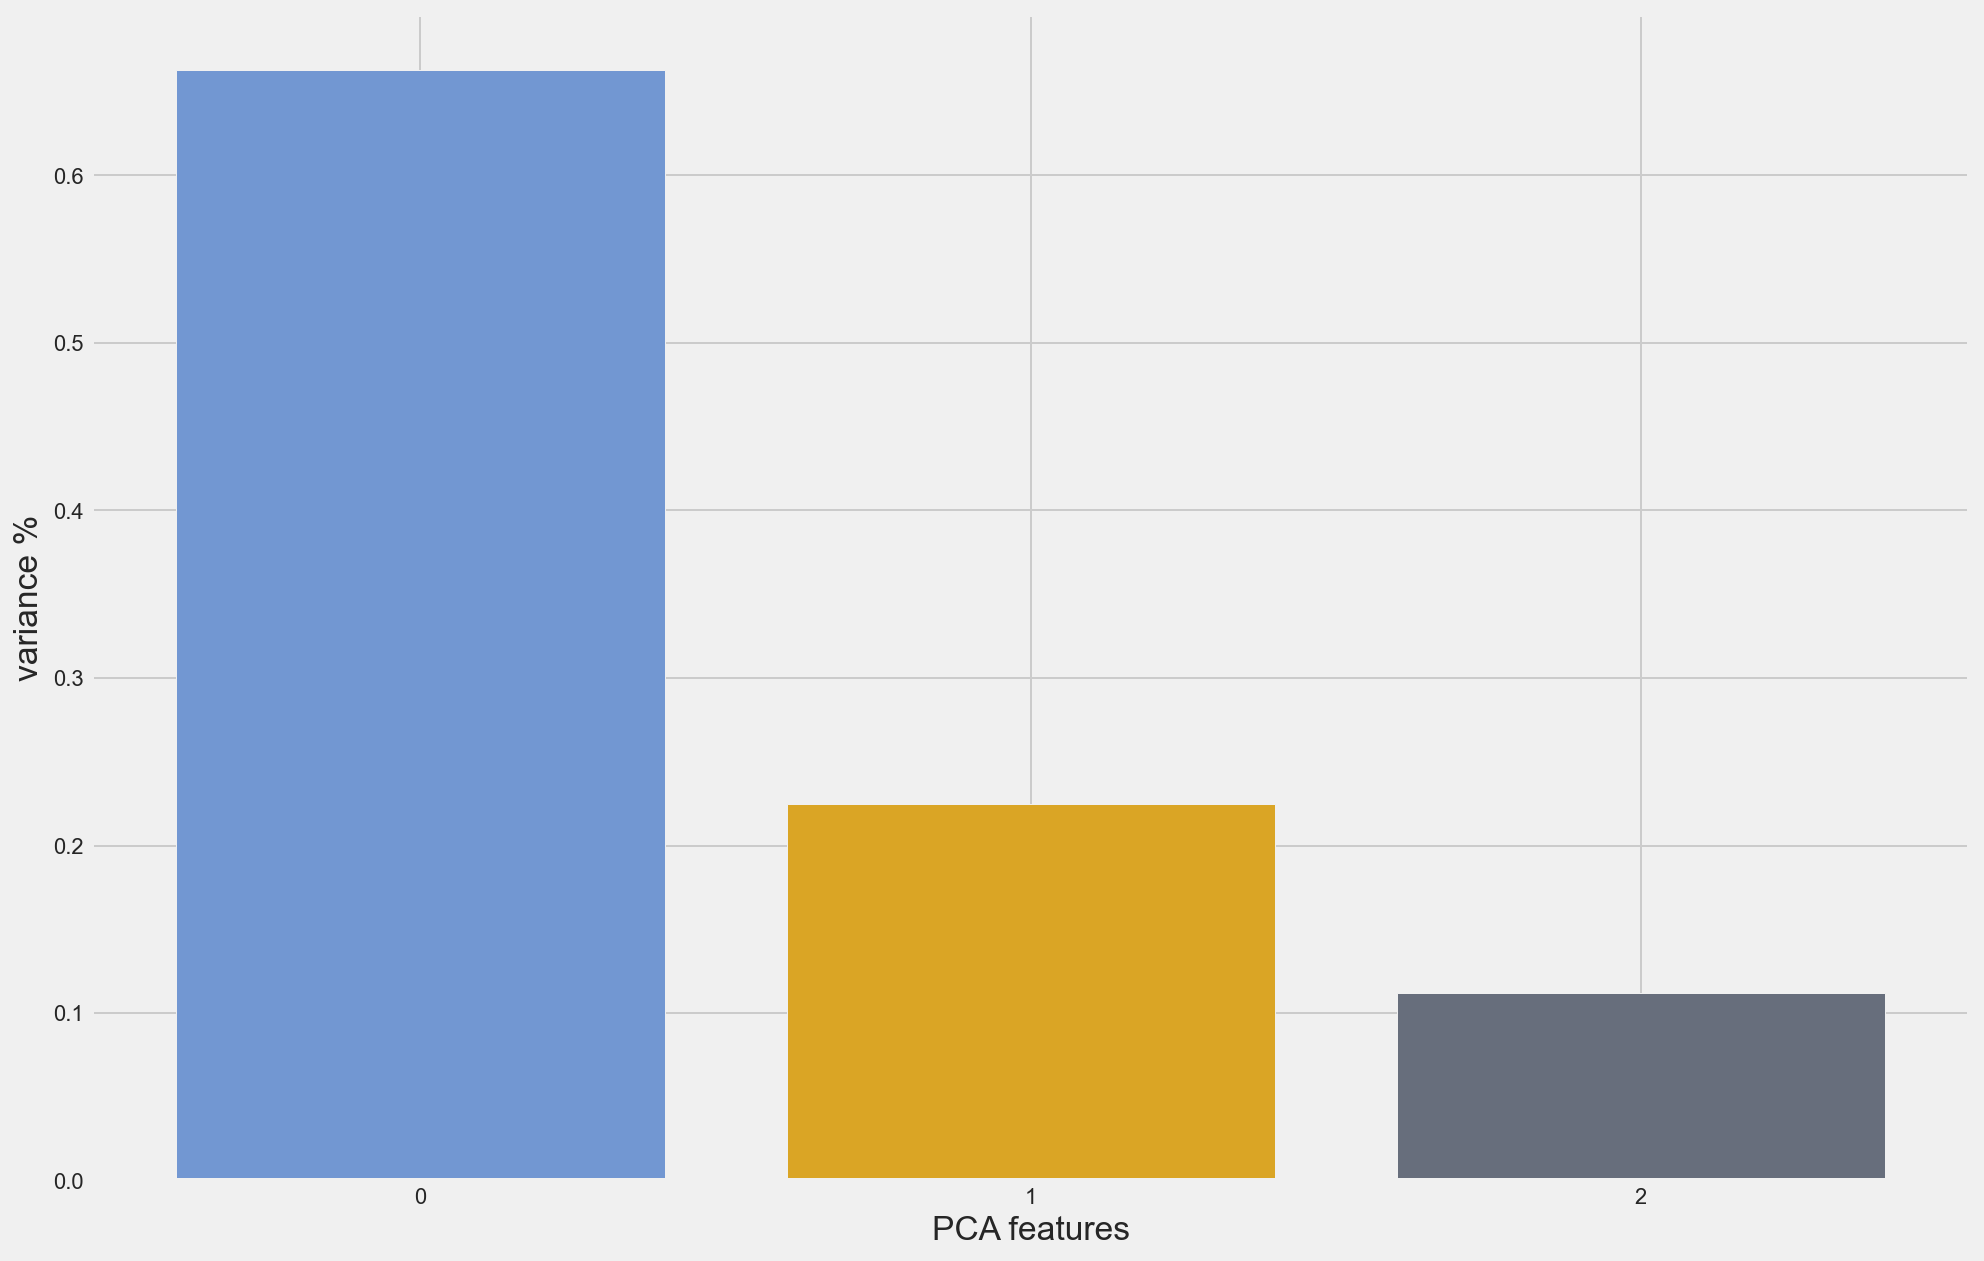

In [136]:
%config InlineBackend.figure_format='retina'
# Standardize the data to have a mean of ~0 and a variance of 1
X_std =  MinMaxScaler().fit_transform(X)
# Create a PCA instance: pca
pca = PCA(n_components=.95)
principalComponents = pca.fit_transform(X)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color=('#7297d2','#daa525', '#676e7c', '#1b2a4d'))
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)
plt.savefig('Images/scree_plot.png', dpi=300, bbox_inches= 'tight', 
            padding_inches = 4, transparent = True )

In [137]:
PCA_components

,0,1,2
0,0.246352,0.494177,0.343113
1,0.246352,0.494177,0.343113
2,0.519373,-0.429926,0.050909
3,0.183891,0.115296,0.183777
4,0.844962,-0.566024,0.072565
...,...,...,...
137,-0.457395,-0.021631,-0.014059
138,0.328597,0.054808,0.193401
139,0.844962,-0.566024,0.072565
140,-0.457395,-0.021631,-0.014059


In [138]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_

pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]



In [139]:
# get the loadings
structure_loading_1 = pc1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=X.columns.values)
str_loading_1

Supermarket             0.175201
Fast Food Restaurant    0.066259
Grocery Store          -0.399830
dtype: float64

In [140]:
# get the loadings
structure_loading_2 = pc2* np.sqrt(eig_values[1])
str_loading_2 = pd.Series(structure_loading_2, index=X.columns.values)
str_loading_2

Supermarket            -0.211598
Fast Food Restaurant    0.127321
Grocery Store          -0.071620
dtype: float64

In [141]:
structure_loading_3 = pc3* np.sqrt(eig_values[2])
str_loading_3 = pd.Series(structure_loading_3, index=X.columns.values)
str_loading_3

Supermarket             0.073795
Fast Food Restaurant    0.155308
Grocery Store           0.058073
dtype: float64

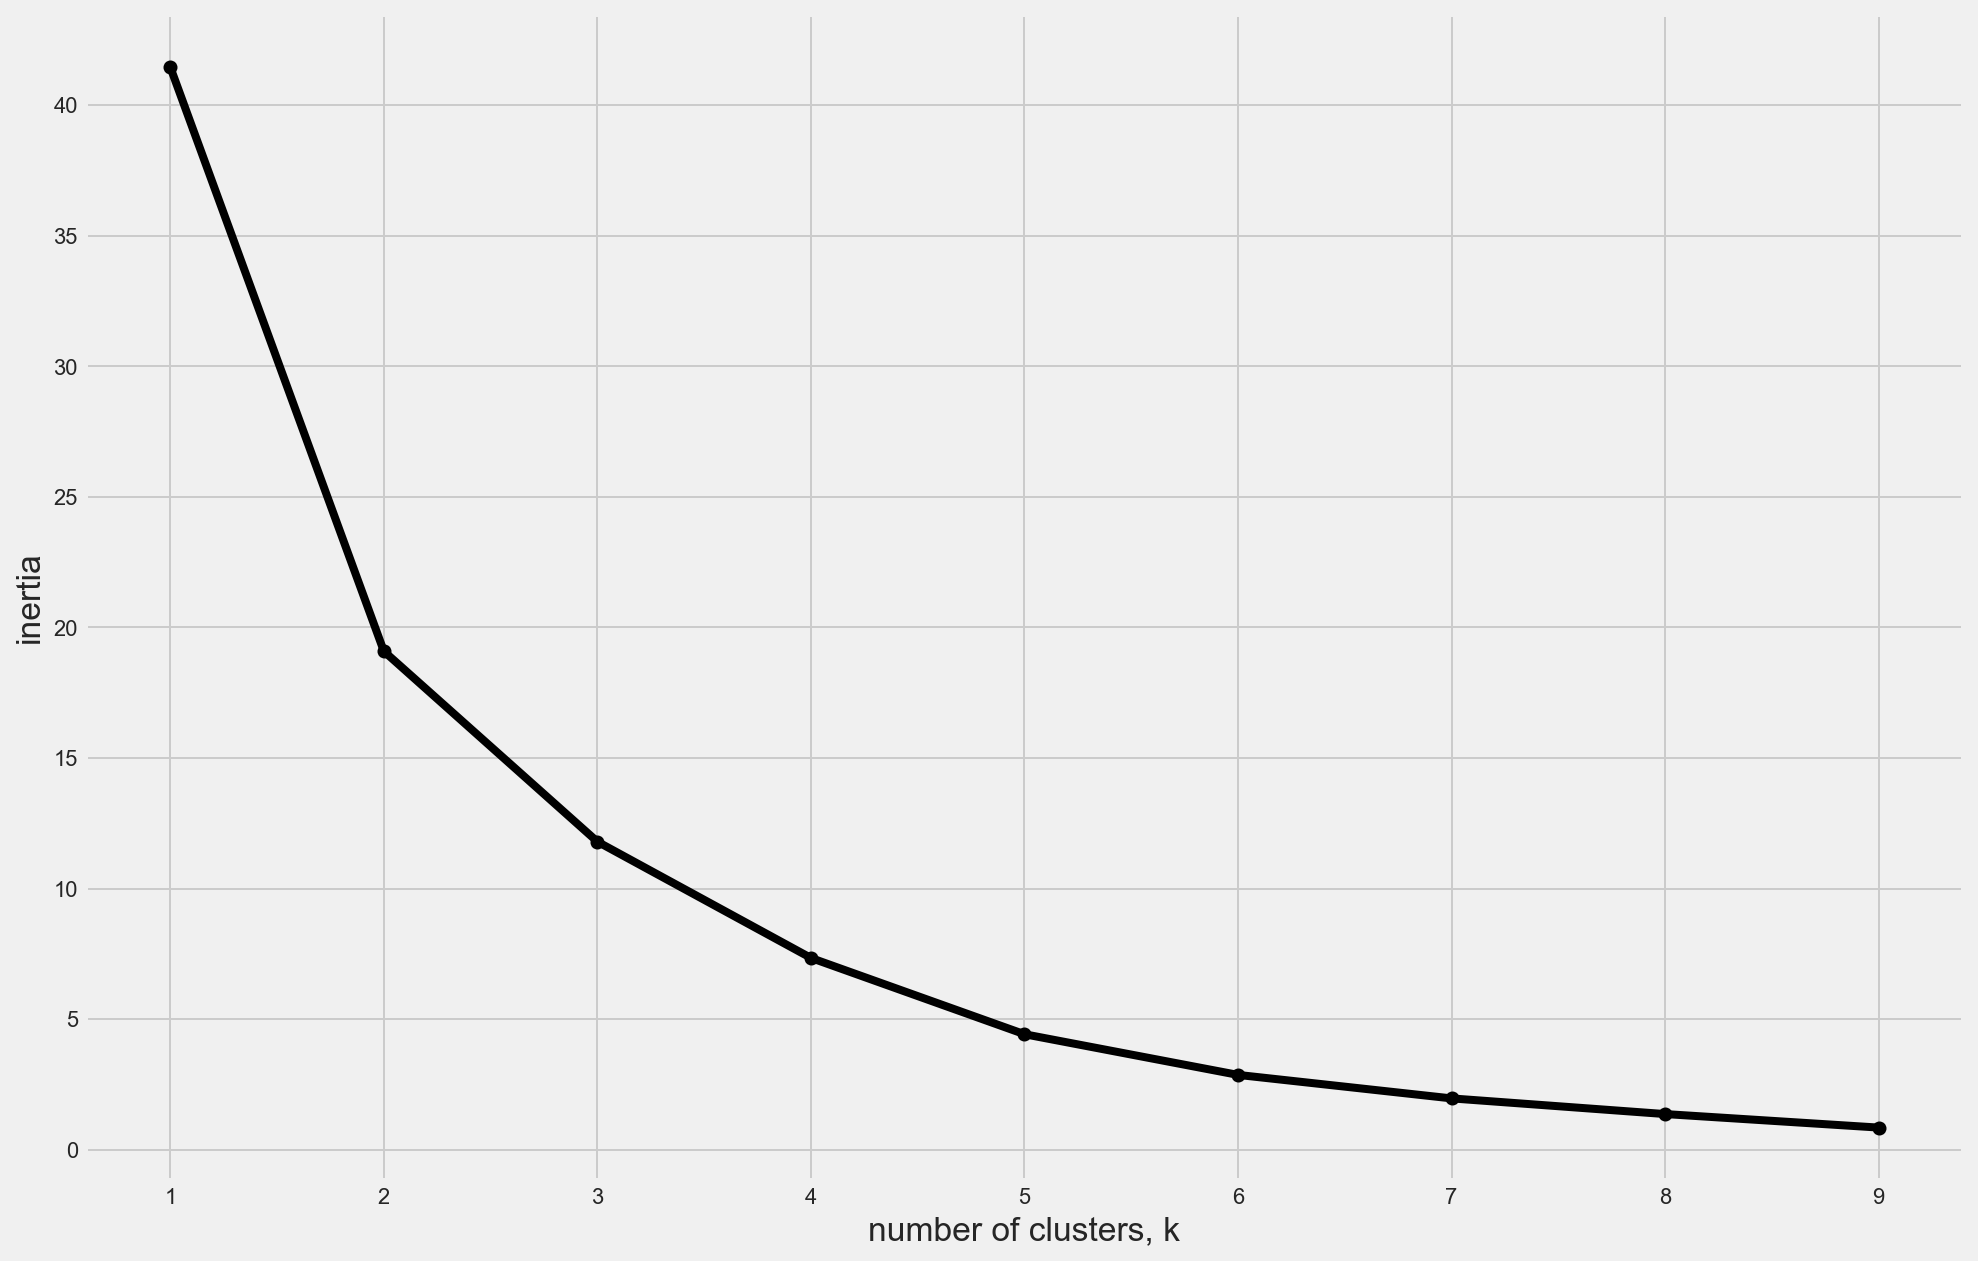

In [142]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

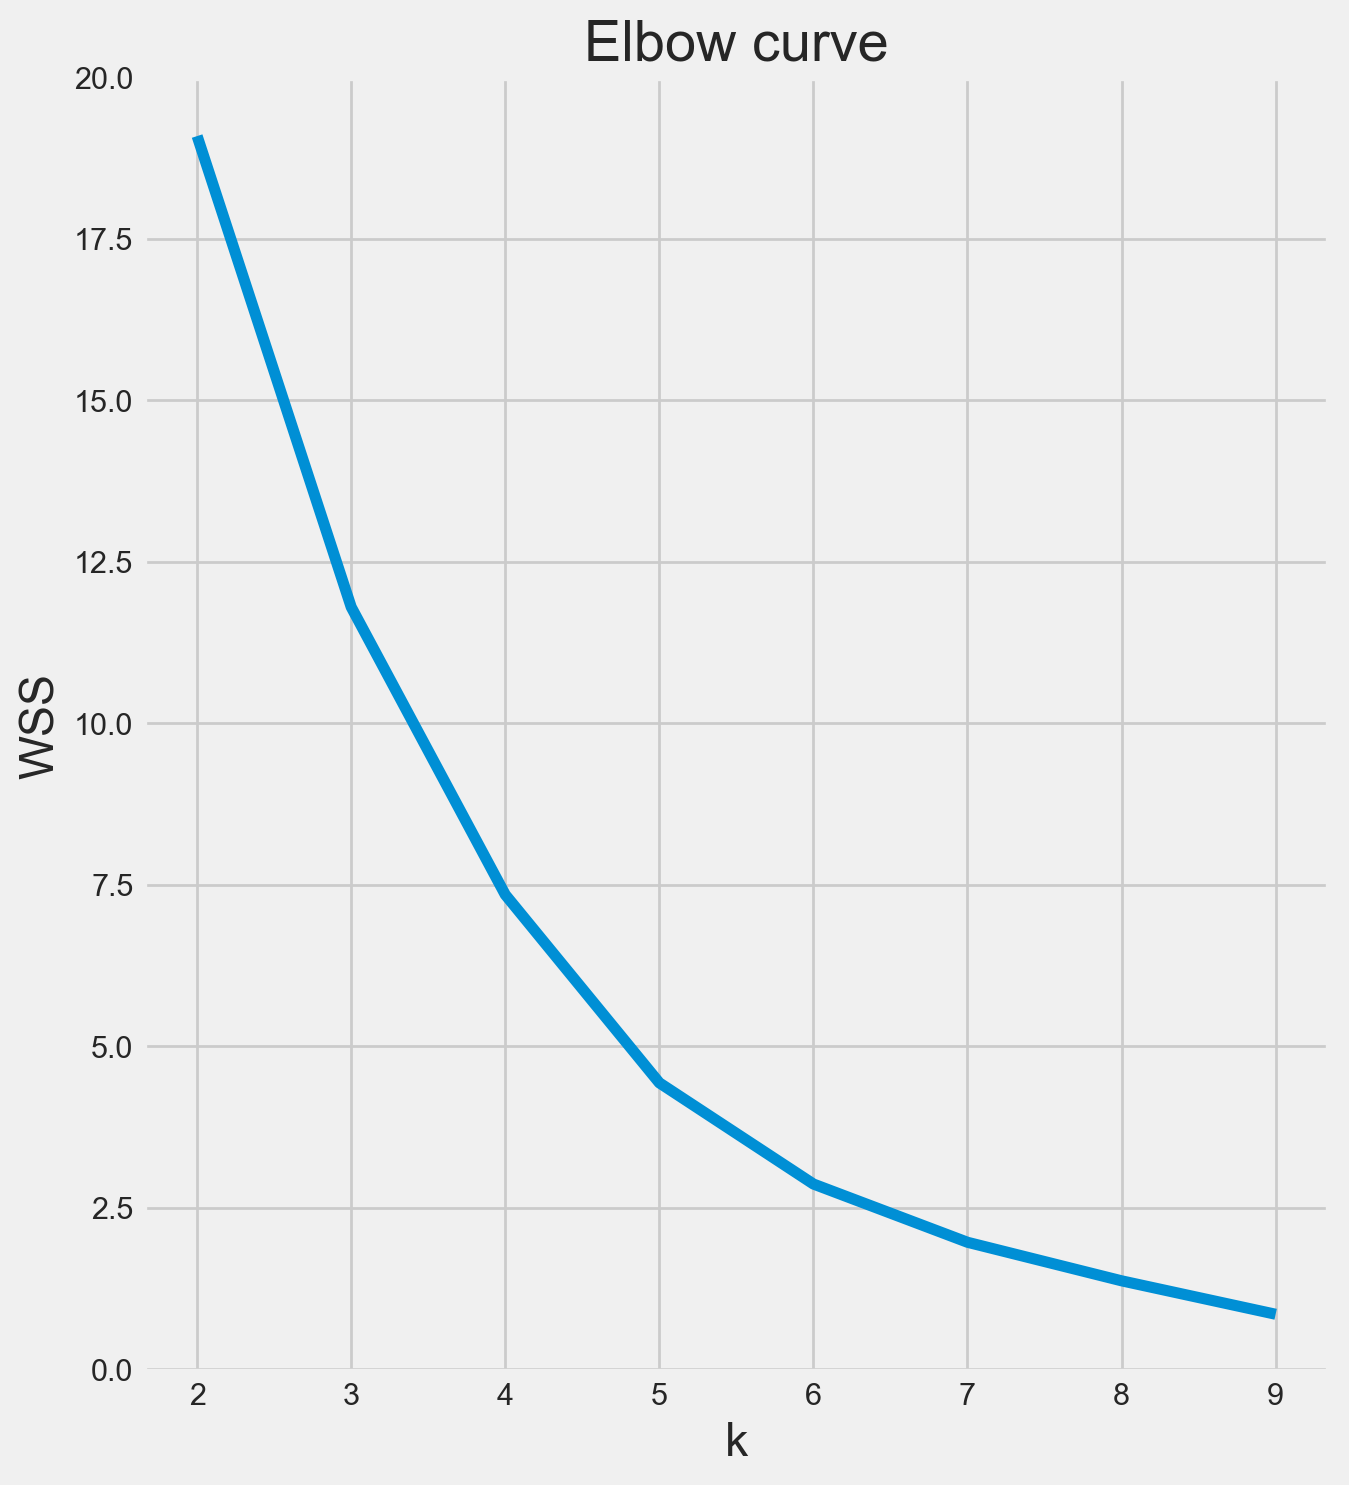

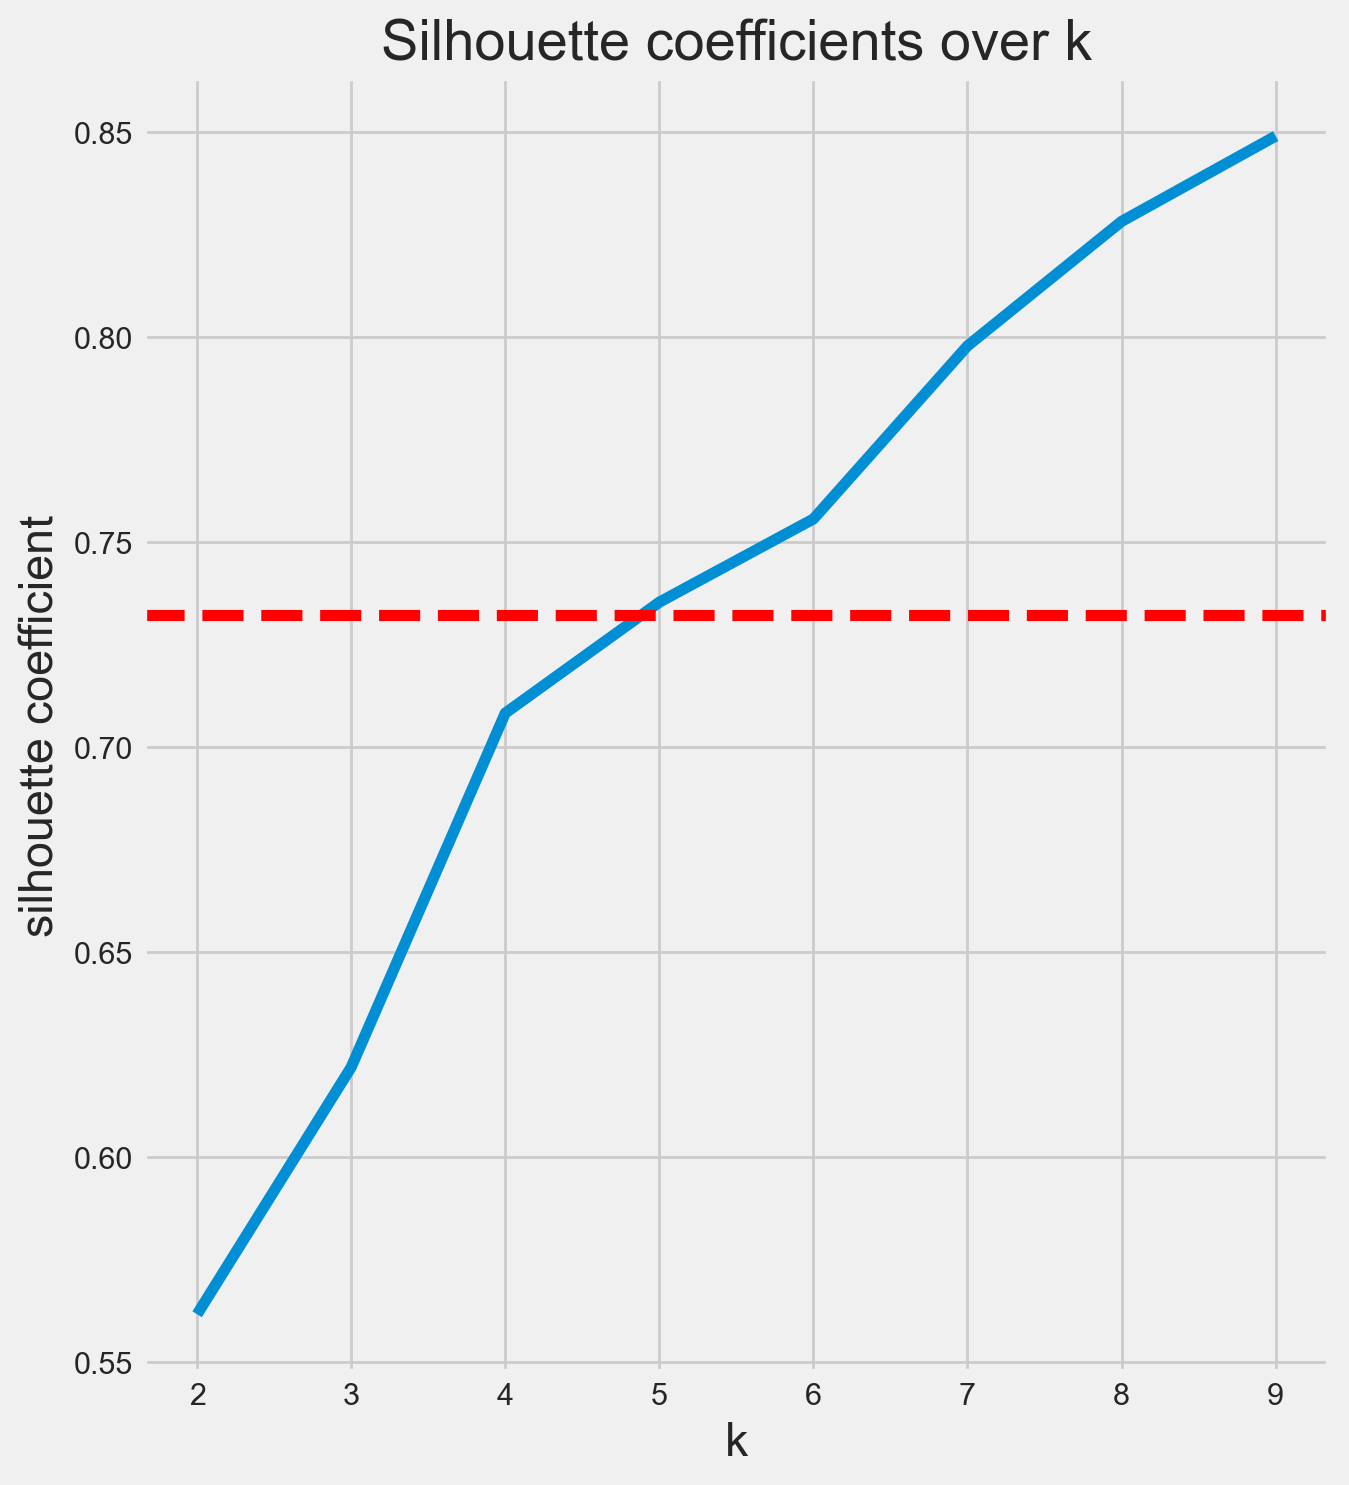

In [143]:
v = PCA_components # change this to test different 



X = v.copy()

distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

    # Plot values of SSE
plt.figure(figsize=(15,8),dpi=100)
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.ylabel('WSS')
plt.plot(range(2, 10), distorsions)
plt.grid(True)

    # check silhouette
silhouette_plot = []
    # Calculate silhouette coefficient for different K
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)
    # Plot Silhouette coefficient
plt.figure(figsize=(15,8), dpi=100)
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

In [144]:
# fit the model with the scaled dataframe
model = KMeans(n_clusters=4).fit(PCA_components)

# create a new dataframe showing the clusters and scaled data
cluster_pca4 = pd.DataFrame()
cluster_pca4['Neighborhood']=final.Neighborhood.values
cluster_pca4['cluster']=model.labels_


# observe the breakdown of clusters
print("Distribution of clusters:")
print(cluster_pca4['cluster'].value_counts())

print(f"Silhouette score: {silhouette_score(PCA_components.values, cluster_pca4['cluster'])}")

Distribution of clusters:
1    72
3    26
2    22
0    22
Name: cluster, dtype: int64
Silhouette score: 0.7083761723412212


In [145]:
# fit the model with the scaled dataframe
model = KMeans(n_clusters=3).fit(PCA_components)

# create a new dataframe showing the clusters and scaled data
cluster_pca3 = pd.DataFrame()
cluster_pca3['Neighborhood']=final.Neighborhood.values
cluster_pca3['cluster']=model.labels_
#cluster_df1 = helper.create_cluster_df(model1,df_scaled)

# observe the breakdown of clusters
print("Distribution of clusters:")
print(cluster_pca3['cluster'].value_counts())

print(f"Silhouette score: {silhouette_score(PCA_components.values, cluster_pca3['cluster'])}")

Distribution of clusters:
1    75
2    45
0    22
Name: cluster, dtype: int64
Silhouette score: 0.6220213970361531


In [146]:
# fit the model with the scaled dataframe
model = KMeans(n_clusters=2).fit(PCA_components)

# create a new dataframe showing the clusters and scaled data
cluster_pca2 = pd.DataFrame()
cluster_pca2['Neighborhood']=final.Neighborhood.values
cluster_pca2['cluster']=model.labels_
#cluster_df1 = helper.create_cluster_df(model1,df_scaled)

# observe the breakdown of clusters
print("Distribution of clusters:")
print(cluster_pca2['cluster'].value_counts())

print(f"Silhouette score: {silhouette_score(PCA_components.values, cluster_pca2['cluster'])}")

Distribution of clusters:
0    75
1    67
Name: cluster, dtype: int64
Silhouette score: 0.5617575069432843


In [147]:
cluster_pca4

,Neighborhood,cluster
0,Bedford Park Bronx,3
1,Belmont Bronx,3
2,City Island Bronx,2
3,Co op City Bronx,3
4,Concourse Bronx,2
...,...,...
137,Ridgewood Queens,1
138,Rockaway Queens,3
139,Whitestone Queens,2
140,Woodhaven Queens,1


In [148]:
cluster_pca3

,Neighborhood,cluster
0,Bedford Park Bronx,2
1,Belmont Bronx,2
2,City Island Bronx,0
3,Co op City Bronx,2
4,Concourse Bronx,0
...,...,...
137,Ridgewood Queens,1
138,Rockaway Queens,2
139,Whitestone Queens,0
140,Woodhaven Queens,1


In [149]:
cluster_pca2

,Neighborhood,cluster
0,Bedford Park Bronx,1
1,Belmont Bronx,1
2,City Island Bronx,1
3,Co op City Bronx,1
4,Concourse Bronx,1
...,...,...
137,Ridgewood Queens,0
138,Rockaway Queens,1
139,Whitestone Queens,1
140,Woodhaven Queens,0


In [150]:
cluster_pca4.cluster.value_counts()

1    72
3    26
2    22
0    22
Name: cluster, dtype: int64

In [151]:
cluster_pca3.cluster.value_counts()

1    75
2    45
0    22
Name: cluster, dtype: int64

In [152]:
cluster_pca2.cluster.value_counts()

0    75
1    67
Name: cluster, dtype: int64

In [153]:
ny.head()
ny['Neighborhood'] = ny['Neighborhood'].map(lambda x: re.sub(r'\W+', ' ', x))
ny

,Neighborhood,Latitude,Longitude
0,Bedford Park Bronx,40.869990,-73.885730
1,Belmont Bronx,40.855460,-73.885690
2,City Island Bronx,40.855640,-73.791710
3,Co op City Bronx,40.879939,-73.823170
4,Concourse Bronx,40.827630,-73.925330
...,...,...,...
137,Ridgewood Queens,40.706070,-73.902610
138,Rockaway Queens,40.663276,-73.776791
139,Whitestone Queens,40.771893,-73.832252
140,Woodhaven Queens,40.710361,-73.859759


In [154]:
final

,Neighborhood,Latitude,Longitude,Supermarket,Fast Food Restaurant,Grocery Store
0,Bedford Park Bronx,40.869990,-73.885730,0.000000,0.666667,0.333333
1,Belmont Bronx,40.855460,-73.885690,0.000000,0.666667,0.333333
2,City Island Bronx,40.855640,-73.791710,0.750000,0.000000,0.250000
3,Co op City Bronx,40.879939,-73.823170,0.222222,0.333333,0.444444
4,Concourse Bronx,40.827630,-73.925330,1.000000,0.000000,0.000000
...,...,...,...,...,...,...
137,Ridgewood Queens,40.706070,-73.902610,0.000000,0.000000,1.000000
138,Rockaway Queens,40.663276,-73.776791,0.333333,0.333333,0.333333
139,Whitestone Queens,40.771893,-73.832252,1.000000,0.000000,0.000000
140,Woodhaven Queens,40.710361,-73.859759,0.000000,0.000000,1.000000


In [155]:
cluster_pca3 = cluster_pca3.join(final.set_index("Neighborhood"), on="Neighborhood")
cluster_pca3

,Neighborhood,cluster,Latitude,Longitude,Supermarket,Fast Food Restaurant,Grocery Store
0,Bedford Park Bronx,2,40.869990,-73.885730,0.000000,0.666667,0.333333
1,Belmont Bronx,2,40.855460,-73.885690,0.000000,0.666667,0.333333
2,City Island Bronx,0,40.855640,-73.791710,0.750000,0.000000,0.250000
3,Co op City Bronx,2,40.879939,-73.823170,0.222222,0.333333,0.444444
4,Concourse Bronx,0,40.827630,-73.925330,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
137,Ridgewood Queens,1,40.706070,-73.902610,0.000000,0.000000,1.000000
138,Rockaway Queens,2,40.663276,-73.776791,0.333333,0.333333,0.333333
139,Whitestone Queens,0,40.771893,-73.832252,1.000000,0.000000,0.000000
140,Woodhaven Queens,1,40.710361,-73.859759,0.000000,0.000000,1.000000


In [156]:
cluster_pca4 = cluster_pca4.join(final.set_index("Neighborhood"), on="Neighborhood")
cluster_pca4

,Neighborhood,cluster,Latitude,Longitude,Supermarket,Fast Food Restaurant,Grocery Store
0,Bedford Park Bronx,3,40.869990,-73.885730,0.000000,0.666667,0.333333
1,Belmont Bronx,3,40.855460,-73.885690,0.000000,0.666667,0.333333
2,City Island Bronx,2,40.855640,-73.791710,0.750000,0.000000,0.250000
3,Co op City Bronx,3,40.879939,-73.823170,0.222222,0.333333,0.444444
4,Concourse Bronx,2,40.827630,-73.925330,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
137,Ridgewood Queens,1,40.706070,-73.902610,0.000000,0.000000,1.000000
138,Rockaway Queens,3,40.663276,-73.776791,0.333333,0.333333,0.333333
139,Whitestone Queens,2,40.771893,-73.832252,1.000000,0.000000,0.000000
140,Woodhaven Queens,1,40.710361,-73.859759,0.000000,0.000000,1.000000


In [157]:
cluster_pca2 = cluster_pca2.join(final.set_index("Neighborhood"), on="Neighborhood")
cluster_pca2

,Neighborhood,cluster,Latitude,Longitude,Supermarket,Fast Food Restaurant,Grocery Store
0,Bedford Park Bronx,1,40.869990,-73.885730,0.000000,0.666667,0.333333
1,Belmont Bronx,1,40.855460,-73.885690,0.000000,0.666667,0.333333
2,City Island Bronx,1,40.855640,-73.791710,0.750000,0.000000,0.250000
3,Co op City Bronx,1,40.879939,-73.823170,0.222222,0.333333,0.444444
4,Concourse Bronx,1,40.827630,-73.925330,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
137,Ridgewood Queens,0,40.706070,-73.902610,0.000000,0.000000,1.000000
138,Rockaway Queens,1,40.663276,-73.776791,0.333333,0.333333,0.333333
139,Whitestone Queens,1,40.771893,-73.832252,1.000000,0.000000,0.000000
140,Woodhaven Queens,0,40.710361,-73.859759,0.000000,0.000000,1.000000


In [158]:
# get the coordinates of New York City
address = 'New York, New York'

geolocator = Nominatim(user_agent="coursera-capstone-project")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York, New York {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York, New York 40.7127281, -74.0060152.


In [165]:
# create map
kclusters = 4
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.tab10(np.linspace(0, 1, len(ys)))
tab10 = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi,mar, fast, cluster in zip(cluster_pca4['Latitude'], 
                                            cluster_pca4['Longitude'], cluster_pca4['Neighborhood'],cluster_pca4['Supermarket'], 
                                            cluster_pca4['Fast Food Restaurant'],cluster_pca4['cluster']):
    label = folium.Popup('{} - Cluster {} - \n Supermarket Score {} \n Fast Food Score {}'.format(poi, cluster, mar, fast), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=tab10[cluster-1],
        fill=True,
        fill_color=tab10[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [160]:
# create map
kclusters = 3
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.tab10(np.linspace(0, 1, len(ys)))
tab10 = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster_pca3['Latitude'], cluster_pca3['Longitude'], cluster_pca3['Neighborhood'], cluster_pca3['cluster']):
    label = folium.Popup('{} - Cluster {}'.format(poi, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=tab10[cluster-1],
        fill=True,
        fill_color=tab10[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [161]:
# create map
kclusters = 2
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.tab10(np.linspace(0, 1, len(ys)))
tab10 = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster_pca2['Latitude'], cluster_pca2['Longitude'], cluster_pca2['Neighborhood'], cluster_pca2['cluster']):
    label = folium.Popup('{} - Cluster {}'.format(poi, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=tab10[cluster-1],
        fill=True,
        fill_color=tab10[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [162]:
cluster_pca3.to_csv('cluster3.csv',index=False)


In [163]:
cluster_pca2.to_csv('cluster2.csv',index=False)


In [164]:
cluster_pca4.to_csv('cluster4.csv',index=False)
